In [1]:
import os
import madmom
import sklearn
import IPython
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

from mir_eval.onset import f_measure

In [2]:
# Convert to wav data

'''audio = np.load('../../data/interim/Audio_TrainVal.npy')
sf.write('../../data/interim/Audio_TrainVal.wav', audio, 44100)

audio = np.load('../../data/interim/Audio_Test.npy')
sf.write('../../data/interim/Audio_Test.wav', audio, 44100)'''

"audio = np.load('../../data/interim/Audio_TrainVal.npy')\nsf.write('../../data/interim/Audio_TrainVal.wav', audio, 44100)\n\naudio = np.load('../../data/interim/Audio_Test.npy')\nsf.write('../../data/interim/Audio_Test.wav', audio, 44100)"

In [3]:
'''num_networks = 12
for num_network in range(num_networks):
    Classes_TrainVal_Raw = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,])
    pad_left = np.clip(num_network-(num_networks//2),0,(num_networks//2))
    pad_right = np.clip((num_networks//2)-num_network,0,(num_networks//2))
    print([[pad_left,pad_right]])
    Classes_TrainVal_Raw = np.concatenate((np.zeros(pad_left),
                                        Classes_TrainVal_Raw[pad_left:-pad_right],
                                        np.zeros(pad_right)))
    print(Classes_TrainVal_Raw)'''

'num_networks = 12\nfor num_network in range(num_networks):\n    Classes_TrainVal_Raw = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,])\n    pad_left = np.clip(num_network-(num_networks//2),0,(num_networks//2))\n    pad_right = np.clip((num_networks//2)-num_network,0,(num_networks//2))\n    print([[pad_left,pad_right]])\n    Classes_TrainVal_Raw = np.concatenate((np.zeros(pad_left),\n                                        Classes_TrainVal_Raw[pad_left:-pad_right],\n                                        np.zeros(pad_right)))\n    print(Classes_TrainVal_Raw)'

In [5]:
pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,pre_max=1./100,post_max=1./100)
detector = madmom.features.onsets.RNNOnsetProcessor()

activation_function = detector('../../data/interim/Audio_Test_44K.wav')
onset_predictions = pick_picker(activation_function)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100
window_length = 0.025
f1_score, precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
print(f1_score)

0.28324778348110125
0.4941670555296313
0.5804946336910871
0.6411572561829212
0.6682221185254317


In [114]:
'''ground_truth = np.load('../../data/interim/Classes_Test.npy')

hop_size_ms = 128/22050
factor = np.arange(len(ground_truth))*hop_size_ms
ground_truth = factor*ground_truth

j = np.where(ground_truth!=0)
ground_truth = ground_truth[j]

ground_truth = ground_truth[:ground_truth.argmax()]+(64/22050)
for s in range(len(ground_truth)-1):
    if ground_truth[s+1]<ground_truth[s]:
        print('ensuring monotonic ground_truth')
        ground_truth[s+1] = ground_truth[s]'''

In [2]:
pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,pre_max=1./100,post_max=1./100)
detector = madmom.features.onsets.CNNOnsetProcessor()

activation_function = detector('../../data/interim/Audio_Test_44K.wav')
onset_predictions = pick_picker(activation_function)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100
window_length = 0.025
f1_score, precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
print(f1_score)

0.4463107378524295
0.6814637072585483
0.7306538692261548
0.7578484303139372
0.7790441911617676


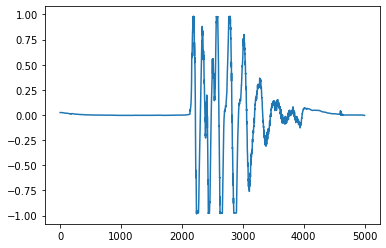

In [107]:
audio_test = np.load('../../data/interim/Audio_Test.npy')
plt.plot(audio_test[40000:45000])

In [8]:
# Main Loop

methods = ['superflux','complex_flux','high_frequency_content','spectral_diff','spectral_flux','modified_kullback_leibler','phase_deviation','weighted_phase_deviation','normalized_weighted_phase_deviation','complex_domain','rectified_complex_domain']

#methods = ['weighted_phase_deviation']

if not os.path.isdir('../../results/madmom_results'):
    os.mkdir('../../results/madmom_results')

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100
frames_per_second = (1/(np.array([256])/44100)).astype(int)

window_lengths = [0.025]

f1_scores = np.zeros((len(methods),len(frames_per_second),len(window_lengths)))

for a in range(len(methods)):

    for b in range(len(frames_per_second)):

        for c in range(len(window_lengths)):
        
            method = methods[a]
            fps = frames_per_second[b]
            window_length = window_lengths[c]

            print('Method = ' + method + ' | Hop Size = ' + str(fps) + ' | Window Length = ' + str(window_length))

            pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_max=1./fps,post_max=1./fps)
            detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method=method,fps=fps)

            activation_function = detector('../../data/interim/Audio_Test_44K.wav')
            onset_predictions = pick_picker(activation_function)

            f1_scores[a,b,c], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)

            print(f1_scores[a,b,c])

Method = superflux | Hop Size = 172 | Window Length = 0.025
0.2539484621778886
Method = complex_flux | Hop Size = 172 | Window Length = 0.025
0.3364711978581916
Method = high_frequency_content | Hop Size = 172 | Window Length = 0.025
0.268165906438952
Method = spectral_diff | Hop Size = 172 | Window Length = 0.025
0.2591331269349845
Method = spectral_flux | Hop Size = 172 | Window Length = 0.025
0.22374250716705762
Method = modified_kullback_leibler | Hop Size = 172 | Window Length = 0.025
0.19374692269817823
Method = phase_deviation | Hop Size = 172 | Window Length = 0.025
0.21638530823580174
Method = weighted_phase_deviation | Hop Size = 172 | Window Length = 0.025
0.42740108070420074
Method = normalized_weighted_phase_deviation | Hop Size = 172 | Window Length = 0.025
0.26526904262753315
Method = complex_domain | Hop Size = 172 | Window Length = 0.025
0.23206518409606078
Method = rectified_complex_domain | Hop Size = 172 | Window Length = 0.025
0.22519106236508954


In [200]:
f1_scores[:,0]

array([[0.11276484, 0.22640518, 0.30397479, 0.34459814, 0.35457888],
       [0.15331295, 0.30254842, 0.36595311, 0.39286442, 0.40061162],
       [0.09495309, 0.19330314, 0.28890327, 0.33532837, 0.33532837],
       [0.18744107, 0.28719593, 0.35263059, 0.38487649, 0.38695078],
       [0.0952536 , 0.19539201, 0.29064561, 0.33591142, 0.33721404],
       [0.08726799, 0.17095409, 0.26668838, 0.32204494, 0.33425594],
       [0.0968032 , 0.19949309, 0.28534053, 0.33832066, 0.33897474],
       [0.12332173, 0.2413393 , 0.38952428, 0.48964031, 0.52975303],
       [0.10307199, 0.20577717, 0.29014214, 0.34718019, 0.3567171 ],
       [0.10234576, 0.1905527 , 0.28904242, 0.33306555, 0.33306555],
       [0.09706072, 0.19299096, 0.28439922, 0.33446382, 0.33478682]])

In [201]:
heuristic = np.array([0.12332173,0.2413393,0.38952428,0.48964031,0.52975303])
stateless_rnn = np.array([0.3836107554417414,0.7257030093734584,0.8345153664302599,0.8446647780925401,0.8573456352022713])
stateful_rnn = np.array([0.7755757900374934,0.7947154471544716,0.8087741935483871,0.8147410358565738,0.8297435897435897])
pretrained_rnn = np.array([0.07146666666666666,0.1472,0.28159999999999996,0.5541333333333333,0.7664])

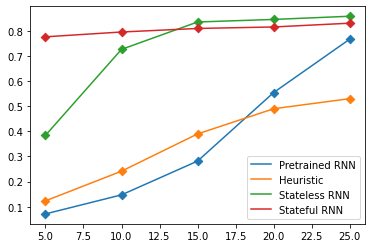

In [217]:
x = np.array([5,10,15,20,25])

spl_1 = make_interp_spline(x, pretrained_rnn)
spl_2 = make_interp_spline(x, heuristic)
spl_3 = make_interp_spline(x, stateless_rnn)
spl_4 = make_interp_spline(x, stateful_rnn)

x_spl = np.linspace(x.min(), x.max(), 5)

pretrained_rnn_spl = spl_1(x_spl)
heuristic_spl = spl_2(x_spl)
stateless_rnn_spl = spl_3(x_spl)
stateful_rnn_spl = spl_4(x_spl)

plt.figure()
plt.plot(x_spl, pretrained_rnn_spl, label='Pretrained RNN')
plt.plot(x_spl, heuristic_spl, label='Heuristic')
plt.plot(x_spl, stateless_rnn_spl, label='Stateless RNN')
plt.plot(x_spl, stateful_rnn_spl, label='Stateful RNN')
plt.scatter(x, pretrained_rnn, marker='D')
plt.scatter(x, heuristic, marker='D')
plt.scatter(x, stateless_rnn, marker='D')
plt.scatter(x, stateful_rnn, marker='D')
plt.legend()
plt.show()